In [1]:
from ias import DecisionTree, PCA, split_dataset
from ias.Datasets import Emnist, Iris
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix

In [2]:
iris_train_x, iris_train_y, iris_test_x, iris_test_y = split_dataset(0.6, Iris)

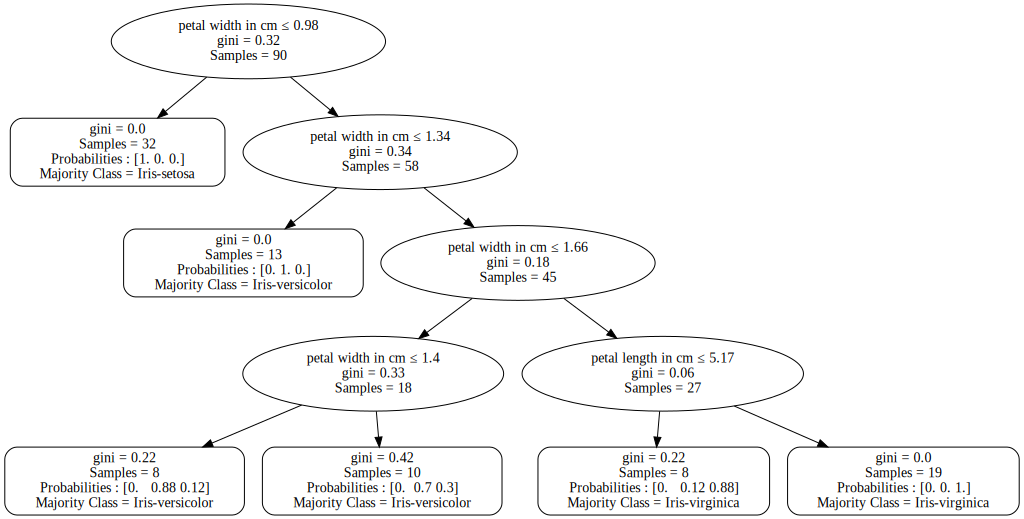

In [3]:
iris_tree = DecisionTree(max_depth=5, splitter="random", do_bagging=True)
iris_tree.fit(iris_train_x, iris_train_y)
iris_tree.show(Iris.features_names, Iris.class_names)

Accuracy score : 0.983


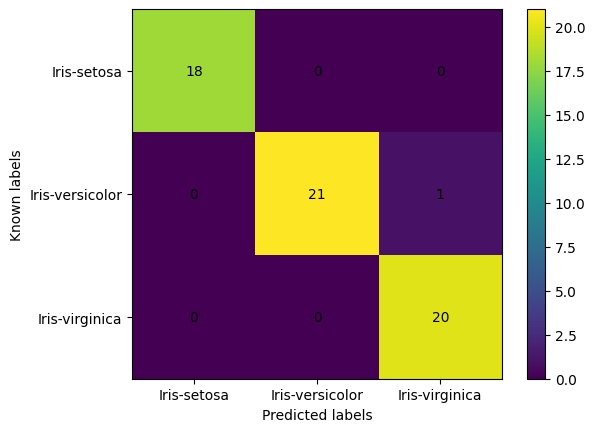

In [4]:
iris_prediction_y = iris_tree.predict(iris_test_x)

iris_conf_matrix = confusion_matrix(Iris.class_number, iris_test_y, iris_prediction_y)
show_confusion_matrix(iris_conf_matrix, Iris.class_names)
print(f"Accuracy score : {accuracy_score(iris_test_y, iris_prediction_y):.3f}")

Accuracy score : 0.944


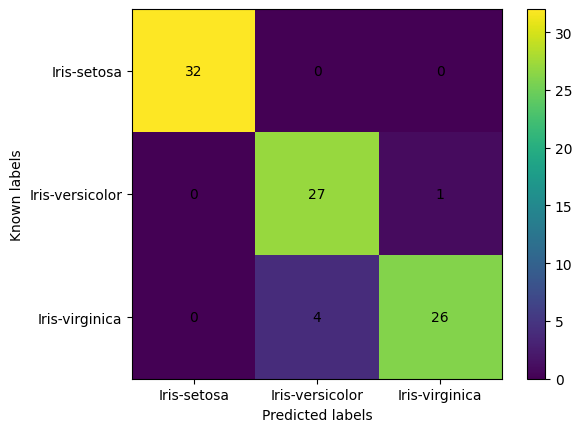

In [5]:
iris_prediction_trained_y = iris_tree.predict(iris_train_x)

iris_conf_matrix = confusion_matrix(Iris.class_number, iris_train_y, iris_prediction_trained_y)
show_confusion_matrix(iris_conf_matrix, Iris.class_names)
print(f"Accuracy score : {accuracy_score(iris_train_y, iris_prediction_trained_y):.3f}")


In [6]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)

In [7]:
pca = PCA(0.90)
pca.fit(emnist_train_x)

In [8]:
emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

In [9]:
emnist_tree = DecisionTree(max_depth=10, splitter="random", do_bagging=True)
emnist_tree.fit(emnist_compressed_train_x, emnist_train_y)

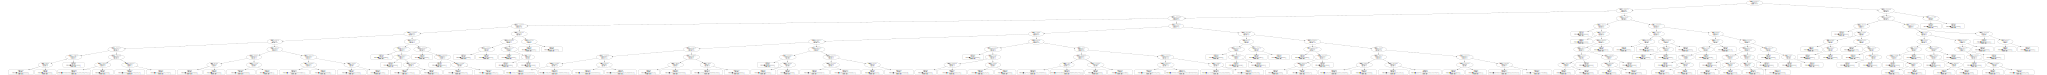

In [10]:
d = emnist_tree.show(class_name=Emnist.class_names)
d

Accuracy score : 0.350


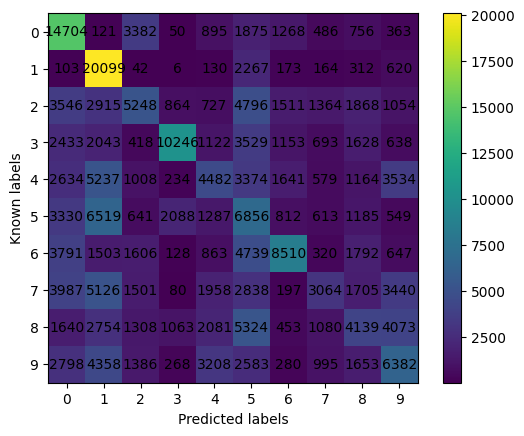

In [11]:
emnist_prediction_y = emnist_tree.predict(emnist_compressed_test_x)

emnist_conf_matrix = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_prediction_y)
show_confusion_matrix(emnist_conf_matrix, Emnist.class_names)
print(f"Accuracy score : {accuracy_score(emnist_test_y, emnist_prediction_y):.3f}")

Accuracy score : 0.513


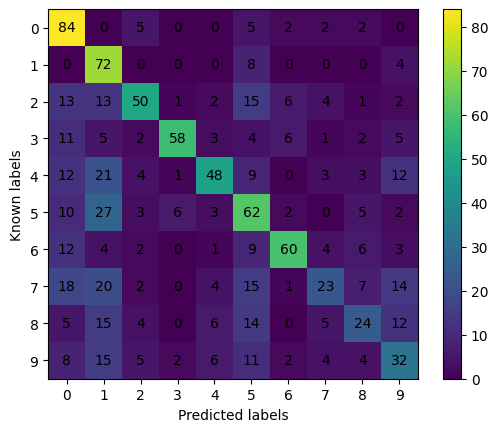

In [12]:
emnist_prediction_trained_y = emnist_tree.predict(emnist_compressed_train_x)

emnist_conf_matrix = confusion_matrix(Emnist.class_number, emnist_train_y, emnist_prediction_trained_y)
show_confusion_matrix(emnist_conf_matrix, Emnist.class_names)
print(f"Accuracy score : {accuracy_score(emnist_train_y, emnist_prediction_trained_y):.3f}")